# Polynomial interpolation

*The content of this notebook is based on the books 'Numerical Mathematics and Computations' by Cheney and Kincaid and 'Numerical Methods' by Dahlquist and Bjork.*

In [21]:
%matplotlib inline

## Methods for locating roots

### Bisection method

The bisection method is a basic method for computing the root of a function. It assumes that a continuous function $f(x)$ is defined over an interval $[a,b]$ in which the sign of the function is opposite at each of the limits. That is, $sign(f(a)) = -sign(f(b))$. 

It uses a divide and conquer approach in which the interval is divided equally into two subintervals $[a,c]$, $[c,b]$ in which $c = (a+b)/2$. The algorithm then evaluates the function for each of the limits of the two subintervals. The interval in which the sign of the function is opposite at the interval limits dicates where future subdivision should occur. 

Convergence is achieved when the current approximation to the root is equal to the previous approximation (within some tolerance). The basic step of the algorithm are as follows:

1. Input the function f(x), interval [a,b], tolerance $\varepsilon$ and maximum number of iterations, $n_{max}$
2. Evaluate f(a), f(b) and determine the sign of each function evaluation
3. Determine two new subintervals [a,c], [c,b] and compute f(c).
4. Check for convergence: if abs(c-a) < $\varepsilon$ we have convergence and return c as the root.
5. Determine the sign of f(c). If $sign(f(a)) \neq sign(f(c))$ then set b = c and return to step 2. Otherwise, set a = c and return to step 2.

Here is an example implementation

In [33]:
def bisection(func, a, b, nmax, eps):
    f_a = func(a)
    f_b = func(b)
    sign_fa = abs(f_a) / f_a
    sign_fb = abs(f_b) / f_b
    
    if sign_fa == sign_fb:
        print 'f(a) = %0.3f and f(b) = %0.3f have the same sign' % (f_a, f_b)
        return

    error = b - a
    for i in xrange(nmax):
        error = 0.5 * error
        c = a + error
        f_c = func(c)
        if abs(error) < eps:
            print 'We have achieved convergence to a root of %0.8f with value %0.8f in %d steps' % (c, f_c, i+1)
            return c
        sign_fc = abs(f_c) / f_c
        if sign_fa != sign_fc:
            b = c
            f_b = f_c
        else:
            a = c
            f_a = f_c

    print 'Failed to reach convergence in %d steps.' % nmax
    return

So let's now define the function $f(x) = x^3 - 3x + 1$ which we wish to find the root of:

In [30]:
def myfunc(x):
    return x**3 - 3 * x + 1

This can be plotted to give an indication of what value of root to expect

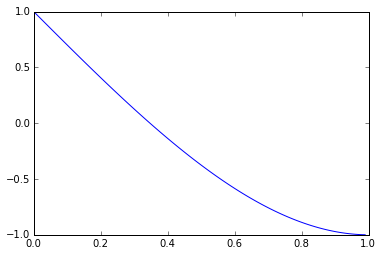

In [32]:
import matplotlib.pyplot as plt
import numpy as np

xvals = np.arange(0.0, 1.0, 0.01)
plt.plot(xvals, myfunc(xvals))

And now evaluate the root using the bisection method with a tolerance of $1.0\times 10^{-5}$.

In [34]:
root = bisection(myfunc, 0.0, 1.0, 20, 1.0e-5)

We have achieved convergence to a root of 0.34729767 with value -0.00000346 in 17 steps
